# Import Libraries and Load Data

In [1]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Connect to PostgreSQL server
import os
from dotenv import load_dotenv
load_dotenv()
from pangres import upsert
from sqlalchemy import text, create_engine

db_username = os.environ.get('db_username')
db_password = os.environ.get('db_password')
db_host = os.environ.get('db_host')
db_port = os.environ.get('db_port')
db_name = os.environ.get('db_name')

def create_db_connection_string(db_username, db_password, db_host, db_port, db_name):
    connection_url = 'postgresql+psycopg2://' + db_username + ':' + db_password + '@' + db_host + ':' + db_port + '/' + db_name
    return connection_url

conn = create_db_connection_string(db_username, db_password, db_host, db_port, db_name)

db_engine = create_engine(conn, pool_recycle = 3600)

    

In [3]:
with db_engine.connect() as connection:
    df = pd.read_sql(text('select * from soloq.matches'), connection)

# Cleaning Data

In [4]:
# Nulls
df.isna().sum()

uuid                         0
matchId                      0
teamId                       0
gameDuration                 0
gameVersion                  0
                            ..
totalTimeSpentDead           0
gameEndedInEarlySurrender    0
gameEndedInSurrender         0
teamEarlySurrendered         0
win                          0
Length: 83, dtype: int64

Weirdly no null values...

In [5]:
# Changing team id from 100 -> blue, 200 -> red
df['teamId'] = df['teamId'].replace({100: 'blue', 200: 'red'})
df['teamId']

0         blue
1         blue
2         blue
3         blue
4         blue
          ... 
199015     red
199016     red
199017     red
199018     red
199019     red
Name: teamId, Length: 199020, dtype: object

# Exploratory Data Analysis

In [6]:
# Describe
df.describe()

,gameDuration,summonerLevel,champExperience,champLevel,kills,deaths,assists,doubleKills,tripleKills,quadraKills,...,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,sightWardsBoughtInGame,longestTimeSpentLiving,timeCCingOthers,timePlayed,totalTimeCCDealt,totalTimeSpentDead
count,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000,...,199020.000000,199020.000000,199020.000000,199020.000000,199020.0,199020.000000,199020.000000,199020.000000,199020.000000,199020.000000
mean,1764.797659,314.702934,13407.688790,14.177922,6.053809,6.074289,7.784409,0.561642,0.072993,0.009517,...,25.316410,1.216978,2.396814,10.889499,0.0,590.585348,25.772616,1764.797659,290.152764,175.806130
std,514.415014,222.426653,5202.994153,3.415254,4.826813,3.522541,5.745063,0.969533,0.299421,0.100496,...,21.039125,1.906190,2.936942,9.057724,0.0,305.885242,25.411391,514.415014,353.758035,123.020231
min,101.000000,30.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,101.000000,0.000000,0.000000
25%,1518.000000,137.000000,10226.000000,13.000000,2.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,5.000000,0.0,397.000000,10.000000,1518.000000,102.000000,82.000000
50%,1791.000000,273.000000,13414.000000,15.000000,5.000000,6.000000,7.000000,0.000000,0.000000,0.000000,...,19.000000,0.000000,1.000000,9.000000,0.0,549.000000,20.000000,1791.000000,203.000000,160.000000
75%,2073.000000,445.000000,16663.000000,17.000000,9.000000,8.000000,11.000000,1.000000,0.000000,0.000000,...,30.000000,2.000000,3.000000,13.000000,0.0,748.000000,35.000000,2073.000000,357.000000,248.000000
max,3986.000000,2414.000000,43242.000000,18.000000,43.000000,27.000000,53.000000,13.000000,5.000000,3.000000,...,239.000000,48.000000,54.000000,121.000000,0.0,2906.000000,463.000000,3986.000000,18500.000000,1035.000000


In [7]:
#  Summary Stats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199020 entries, 0 to 199019
Data columns (total 83 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   uuid                            199020 non-null  object
 1   matchId                         199020 non-null  object
 2   teamId                          199020 non-null  object
 3   gameDuration                    199020 non-null  int64 
 4   gameVersion                     199020 non-null  object
 5   summonerName                    199020 non-null  object
 6   puuid                           199020 non-null  object
 7   lane                            199020 non-null  object
 8   role                            199020 non-null  object
 9   summonerLevel                   199020 non-null  int64 
 10  teamPosition                    199020 non-null  object
 11  champExperience                 199020 non-null  int64 
 12  champLevel                    

In [8]:
# All Columns
df.columns

Index(['uuid', 'matchId', 'teamId', 'gameDuration', 'gameVersion',
       'summonerName', 'puuid', 'lane', 'role', 'summonerLevel',
       'teamPosition', 'champExperience', 'champLevel', 'championName',
       'kills', 'deaths', 'assists', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'firstBloodAssist', 'firstBloodKill', 'unrealKills',
       'totalDamageDealt', 'totalDamageDealtToChampions',
       'totalDamageShieldedOnTeammates', 'totalDamageTaken', 'totalHeal',
       'trueDamageDealt', 'trueDamageDealtToChampions', 'trueDamageTaken',
       'magicDamageDealt', 'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'i

In [10]:
# Length of games
df['gameDuration'].describe()

count    199020.000000
mean       1764.797659
std         514.415014
min         101.000000
25%        1518.000000
50%        1791.000000
75%        2073.000000
max        3986.000000
Name: gameDuration, dtype: float64

Mean very close to mode so game length follows pretty normal distribution

<Axes: ylabel='gameDuration'>

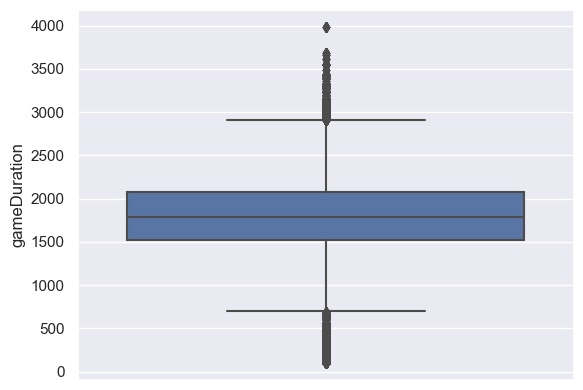

In [11]:
sns.boxplot(data = df, y = 'gameDuration')

Many games very low game duration -> might constitute remakes (player is afk)

## Seperating numerical and categorical features

In [12]:
df.describe().columns

Index(['gameDuration', 'summonerLevel', 'champExperience', 'champLevel',
       'kills', 'deaths', 'assists', 'doubleKills', 'tripleKills',
       'quadraKills', 'pentaKills', 'largestKillingSpree', 'largestMultiKill',
       'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalMinionsKill

In [13]:
df_num = ['gameDuration', 'champExperience',
       'champLevel', 'kills', 'deaths', 'assists', 'doubleKills',
       'tripleKills', 'quadraKills', 'pentaKills', 'largestKillingSpree',
       'largestMultiKill', 'killingSprees', 'unrealKills', 'totalDamageDealt',
       'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken', 'baronKills', 'damageDealtToBuildings',
       'damageDealtToObjectives', 'damageDealtToTurrets', 'objectivesStolen',
       'objectivesStolenAssists', 'dragonKills', 'inhibitorKills',
       'inhibitorTakedowns', 'inhibitorsLost', 'turretKills',
       'turretTakedowns', 'turretsLost', 'goldEarned', 'goldSpent',
       'neutralMinionsKilled', 'totalMinionsKilled', 'itemsPurchased',
       'detectorWardsPlaced', 'visionScore', 'visionWardsBoughtInGame',
       'wardsKilled', 'wardsPlaced', 'sightWardsBoughtInGame',
       'longestTimeSpentLiving', 'timeCCingOthers', 'timePlayed',
       'totalTimeCCDealt', 'totalTimeSpentDead']
df_cat = ['teamId', 'item0', 'item1', 'item2',
       'item3', 'item4', 'item5', 'item6', 'lane', 'role', 'teamPosition', 'championName', 'gameEndedInEarlySurrender', 'gameEndedInSurrender',
       'teamEarlySurrendered', 'summonerLevel', 'win']

# Distribution of Data

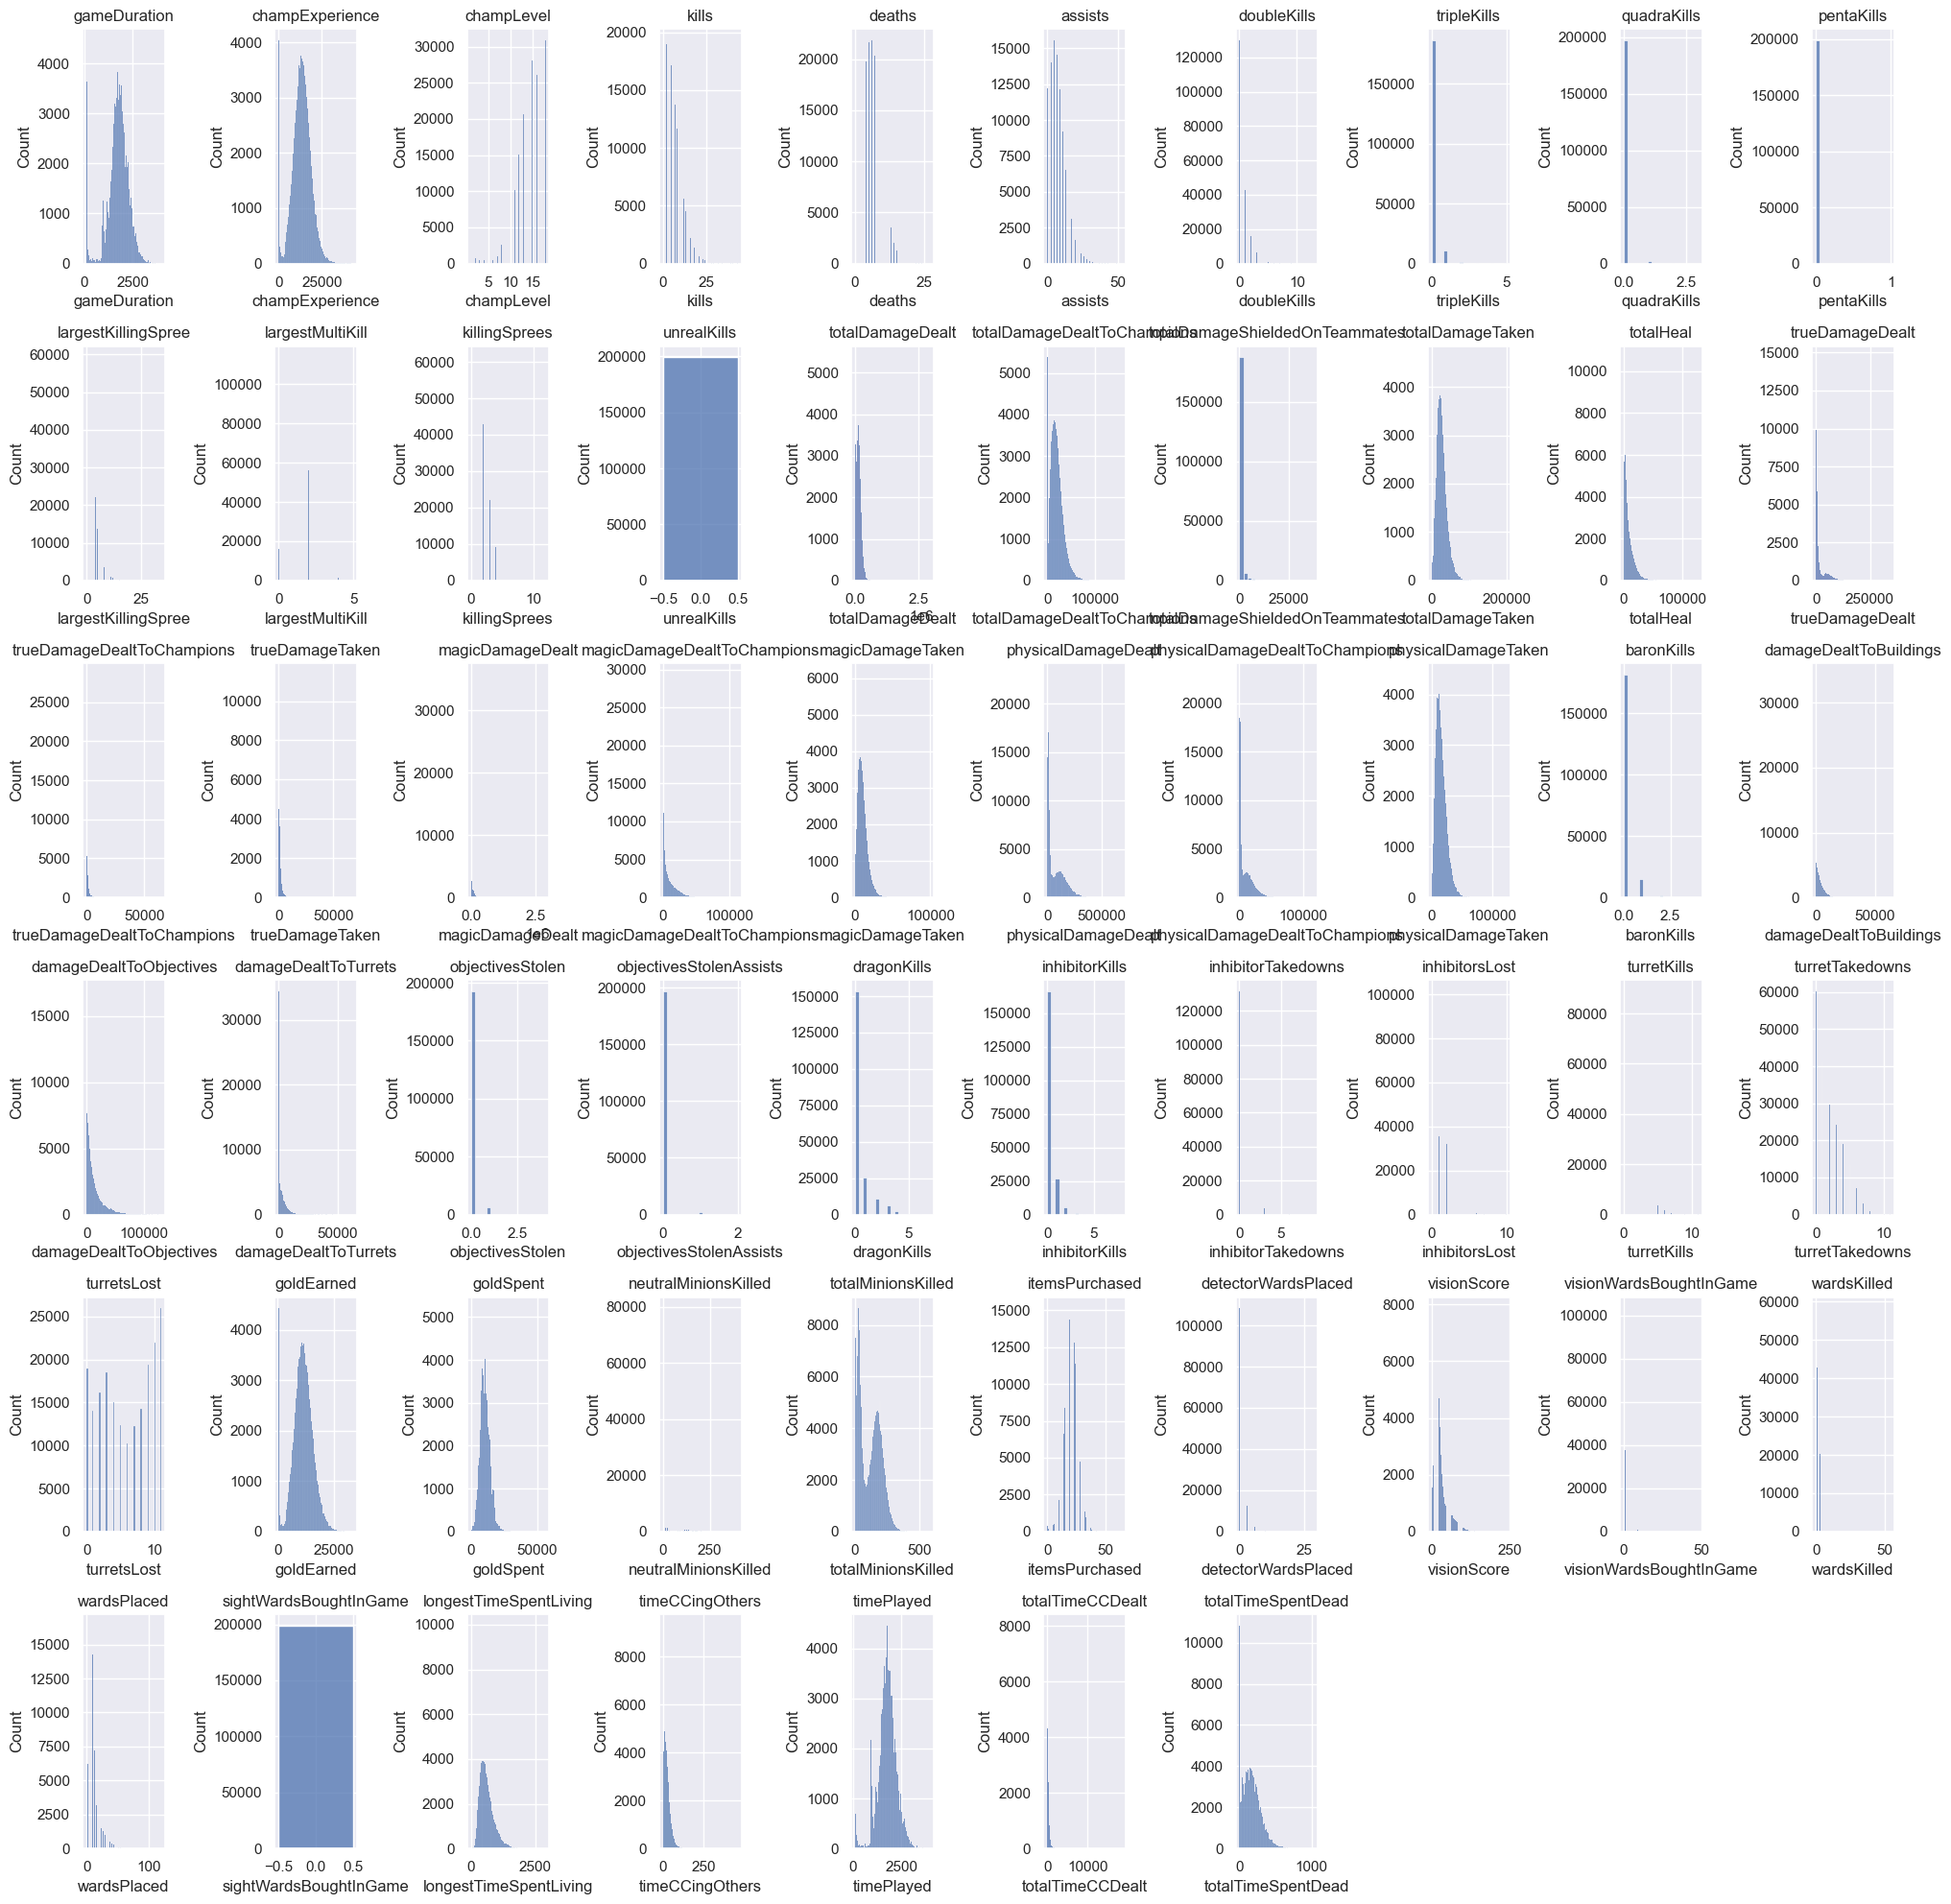

In [14]:
fig, axs = plt.subplots(6, 10, figsize=(20, 20))

axs = axs.flatten()

for i, feature in enumerate(df_num):
    sns.histplot(data = df, x = feature, ax = axs[i])
    axs[i].set_title(feature)

for ax in axs[len(df_num):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Correlations

Kills -> Gold Spent
total dmg to champs -> gold spent 
Gold spent and gold earned are basically the same feature
Game duration and time played are the same feature

Just based on game knowledge, the features I think will most influence a win/loss are:
- KDA
- total dmg to champs
- baron kills
- dragon kills
- turrettakedowns
- goldearned
- inhib kills
- neutral minions killed -> cs
- role? what roles have highest winrate

<Axes: >

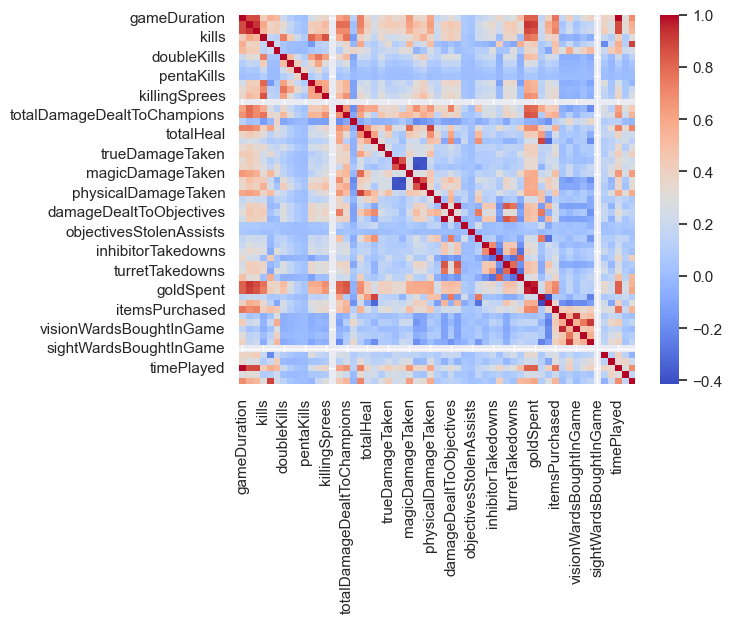

In [15]:
# Heatmap
correlation_matrix = df[df_num].corr()

sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot = False,)

In [16]:
df['summonerName'][df['timePlayed'] == df['gameDuration']]

0               Deadliestz
1               Eneritus61
2                   Kegman
3         Yurkie Da Turkie
4           Yhark Da Shark
                ...       
199015           Gganga121
199016      I crash planes
199017              Tohmyr
199018       RagingTheWild
199019          thedonny11
Name: summonerName, Length: 199020, dtype: object

# Team composition

In [17]:
# Filter Sides
blueside_df = df[df['teamId'] == 'blue']
redside_df = df[df['teamId'] == 'red']

In [18]:
blue_winrate = sum(blueside_df['win'] == True) / (sum(blueside_df['win'] == False) + sum(blueside_df['win'] == True))
blue_winrate

0.49879409104612604

In [19]:
# Winrate by side
red_winrate = sum(redside_df['win'] == True) / (sum(redside_df['win'] == False) + sum(redside_df['win'] == True))
red_winrate

0.501205908953874

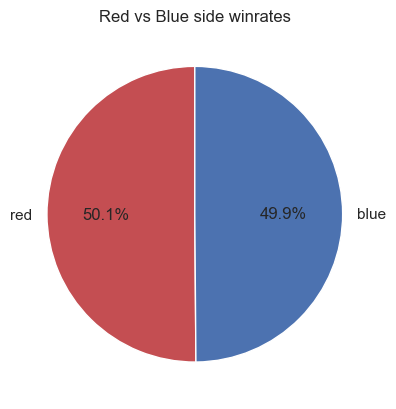

In [20]:
plt.pie([red_winrate, blue_winrate], labels = ['red', 'blue'], colors = ['r', 'b'], startangle = 90, autopct='%1.1f%%')
plt.title('Red vs Blue side winrates')
plt.show()

So red has a slightly higher winrate than blue, which lines up with the general consensus of the community that red always has a slight advantage.

# Objectives Features

In [21]:
# Baron
df['teambaronKills'] = df.groupby(['matchId', 'teamId'])['baronKills'].transform('sum')

# Dragon
df['teamdragonKills'] = df.groupby(['matchId', 'teamId'])['dragonKills'].transform('sum')

# Towers
df['teamturretKills'] = df.groupby(['matchId', 'teamId'])['turretKills'].transform('sum')

# Inhibitors
df['teaminhibitorKills'] = df.groupby(['matchId', 'teamId'])['inhibitorKills'].transform('sum')

In [22]:
objectives = ['teambaronKills', 'teamdragonKills', 'teamturretKills', 'teaminhibitorKills']

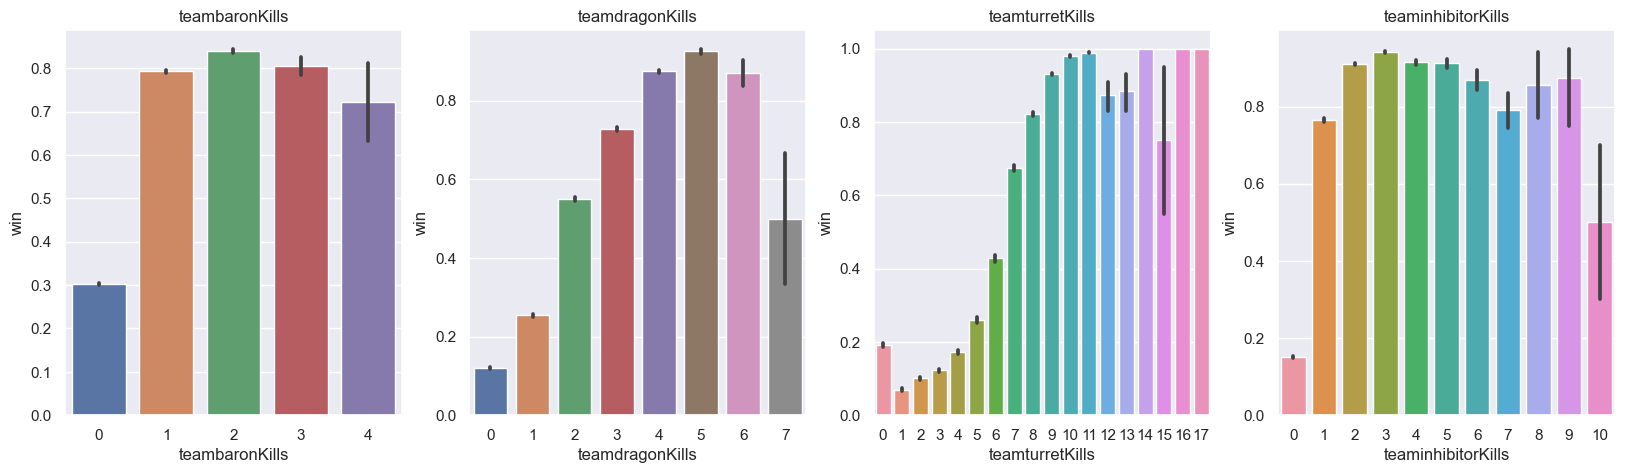

In [23]:
fig, axs = plt.subplots(1, len(objectives), figsize=(20, 5))

for i, feature in enumerate(objectives):
    sns.barplot(data = df, x = feature, y = 'win', ax = axs[i])
    axs[i].set_title(feature)

So clearly team objective kills are very important contributors to winning

# KDA

In [104]:
# Individual KDA
# df['KDA'] = (df['kills'] + df['assists']) / df['deaths']

# Kills
df['teamKills'] = df.groupby(['matchId', 'teamId'])['kills'].transform('sum')

# Assists
df['teamAssists'] = df.groupby(['matchId', 'teamId'])['assists'].transform('sum')

# Deaths
df['teamDeaths'] = df.groupby(['matchId', 'teamId'])['deaths'].transform('sum')

# df['teamKDA'] = df.groupby(['matchId', 'teamId'])['KDA'].transform('sum')

In [107]:
kda = ['teamKills', 'teamAssists', 'teamDeaths']
for i, feature in enumerate(kda):
    sns.barplot(data = df, x = kda, y = 'win', ax = axs[i])
    axs[i].set_title(feature)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Multi-kills

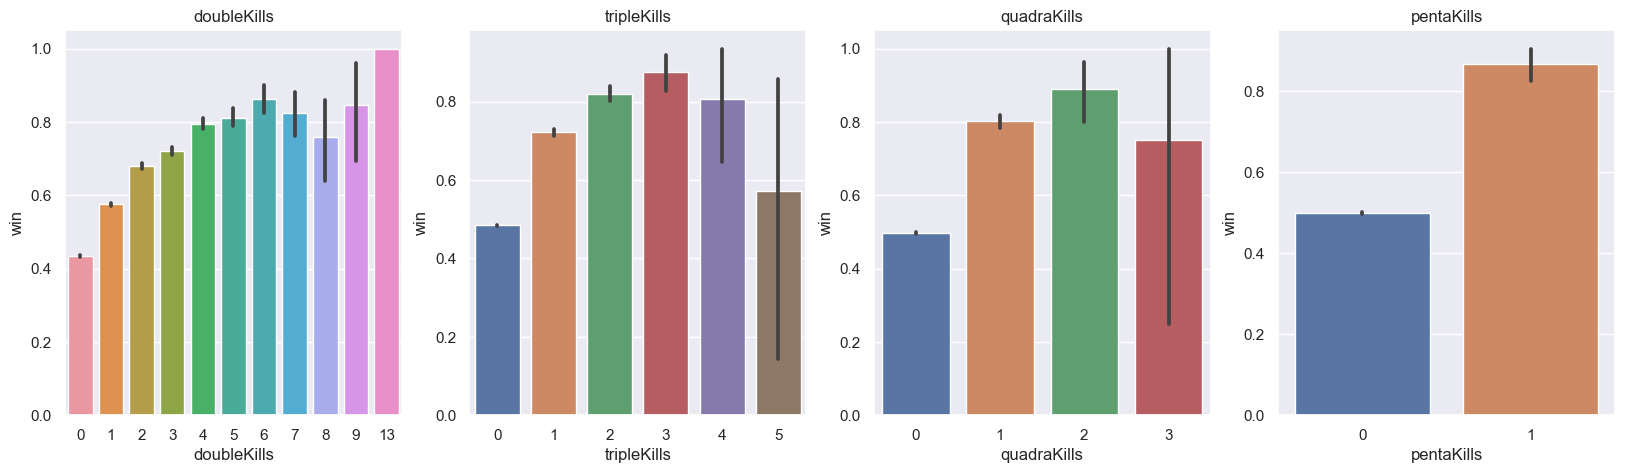

In [25]:
killstreaks = ['doubleKills', 'tripleKills', 'quadraKills', 'pentaKills']
fig, axs = plt.subplots(1, len(killstreaks), figsize=(20, 5))

for i, feature in enumerate(killstreaks):
    sns.barplot(data = df, x = feature, y = 'win', ax = axs[i])
    axs[i].set_title(feature)

## More multi-kills -> more wins?

# Team Economy

<Axes: xlabel='gameDuration', ylabel='teamGold'>

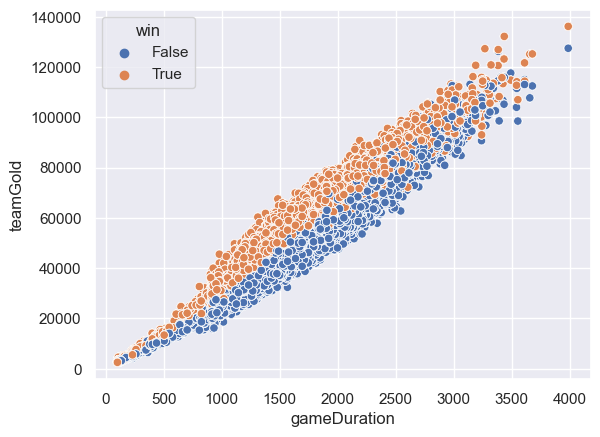

In [26]:

df['teamGold'] = df.groupby(['matchId', 'teamId'])['goldEarned'].transform('sum')
df['teamgoldDifference'] = df['teamGold'][df['teamId'] == 'red'] - df['teamGold'][df['teamId'] == 'blue']

sns.scatterplot(data = df, x = 'gameDuration', y = 'teamGold', hue = 'win')

As the orange dots represent wins, and are almost always above their corresponding blue dots, we can see that generally the team with higher gold wins.

<Axes: >

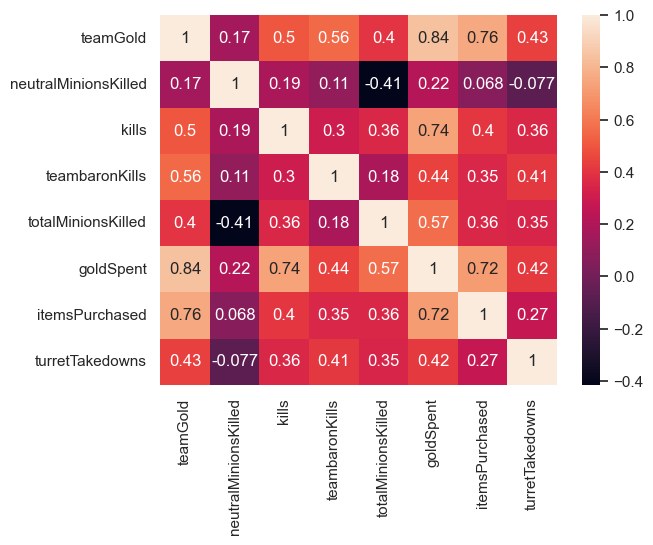

In [27]:
gold_corr = df[['teamGold', 'neutralMinionsKilled', 'kills', 'teambaronKills', 'totalMinionsKilled', 'goldSpent', 'itemsPurchased', 'turretTakedowns']].corr()
sns.heatmap(gold_corr, annot = True)

From this we can see what correlates most with team gold.
- Number of items and gold spent have high correlation with team gold
- kills and baron kills have medium correlations
- Turrets and CS have low correlations with overall gold income which is counter-intuitive to common game knowledge

In [28]:
win_loss_items = df.groupby(['win'])['itemsPurchased'].mean().reset_index()
win_loss_items

,win,itemsPurchased
0,False,19.794292
1,True,19.959311


# Damage stats

<Axes: >

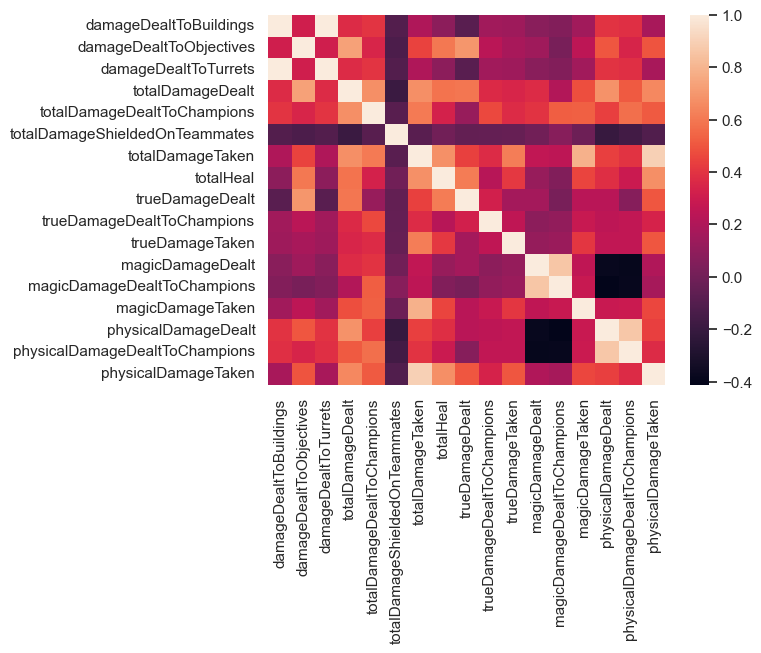

In [30]:
dmg_corr = df[['damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'totalDamageDealt', 'totalDamageDealtToChampions', 'totalDamageShieldedOnTeammates',
       'totalDamageTaken', 'totalHeal', 'trueDamageDealt',
       'trueDamageDealtToChampions', 'trueDamageTaken', 'magicDamageDealt',
       'magicDamageDealtToChampions', 'magicDamageTaken',
       'physicalDamageDealt', 'physicalDamageDealtToChampions',
       'physicalDamageTaken']].corr()
sns.heatmap(dmg_corr)

Is damage condusive to a win??

## Other stats

<Axes: >

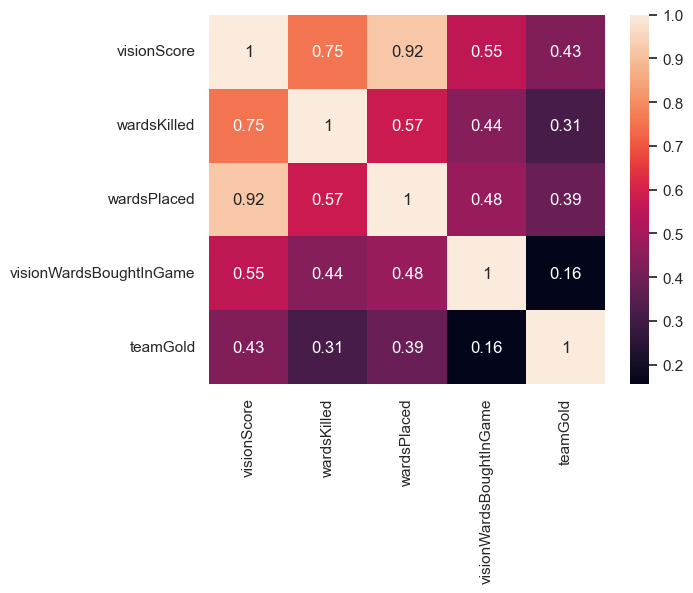

In [31]:
# Vision
vision_corr = df[['visionScore', 'wardsKilled', 'wardsPlaced', 'visionWardsBoughtInGame', 'teamGold']].corr()
sns.heatmap(vision_corr, annot=True)

Vision score has a very high correlation with wards killed and placed and a medium correlation with wards bought. For simplicity sake, I will only use vision score as it is supposed to encapsulate all other three features.

<Axes: xlabel='win', ylabel='visionScore'>

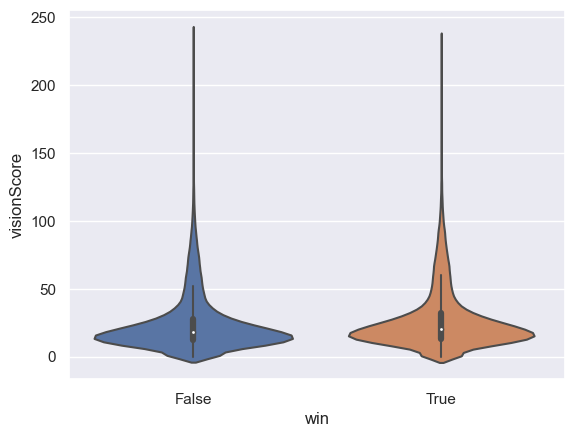

In [32]:
sns.violinplot(data = df, x = 'win', y = 'visionScore')

Seems like all that warding really doesn't make that big of a difference...

<Axes: xlabel='objectivesStolen', ylabel='win'>

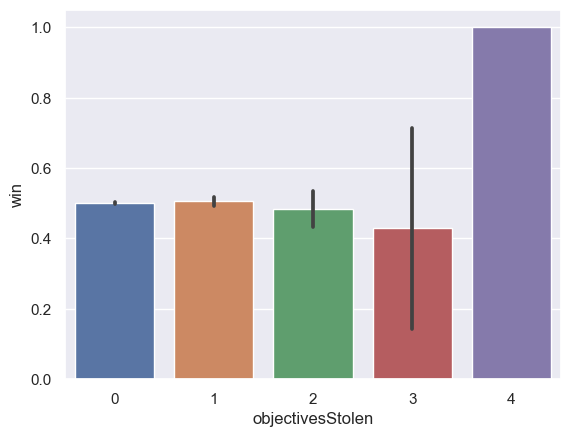

In [33]:
sns.barplot(data = df, x = 'objectivesStolen', y = 'win')

We see that hail mary baron plays aren't actually as impactful as we think (despite feeling like a god if you pull one off in game). Interesting thing to note though is that as more objectives are stolen, the spread of winrates increases greatly suggesting that making these hail mary plays does influence the game...

# Feature Engineering

# Model Building

- Choose relevant columns
- Get dummy data
- Train/test split
- Random forest
- xGboost